<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

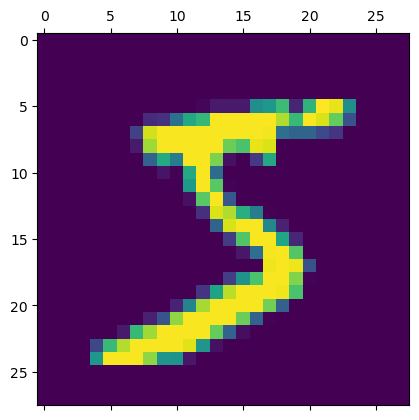

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5


Normalizing pixel values is a common preprocessing step in machine learning, especially for tasks involving image data. In the context of image processing, pixel values usually range from 0 to 255, where 0 represents black and 255 represents white. Normalizing the pixel values to a scale between 0 and 1 has several advantages:


In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4612 - accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.9108
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.9177
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.9205
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.9222
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2762 - accuracy: 0.9235
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2725 - accuracy: 0.9252
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.9254
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2680 - accuracy: 0.9268
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.266

In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.9244


[0.2703727185726166, 0.9243999719619751]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.12465056e-06, 1.00118342e-11, 6.84376937e-06, 9.62212158e-04,
       4.95263635e-08, 4.30202044e-06, 1.05354926e-10, 3.47317934e-01,
       1.89464981e-06, 5.82780922e-05], dtype=float32)

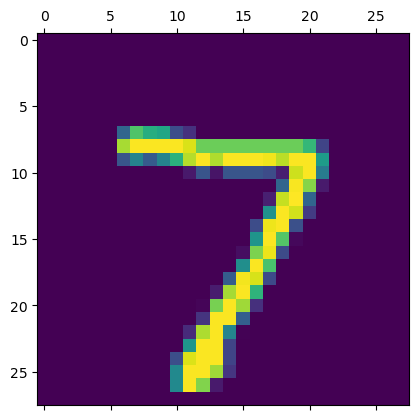

In [18]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    4,    0,    7,    6,    3,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  926,   19,    7,    6,   11,   11,   36,    4],
       [   1,    0,   20,  928,    0,   21,    2,   13,   19,    6],
       [   2,    2,    7,    1,  910,    0,    8,    4,    9,   39],
       [   9,    2,    2,   39,    8,  777,   13,    6,   30,    6],
       [   9,    3,    7,    1,    8,   18,  908,    3,    1,    0],
       [   1,    6,   23,    7,    7,    1,    0,  959,    2,   22],
       [   4,    7,    7,   28,    9,   35,    9,   12,  858,    5],
       [   8,    7,    2,   13,   25,    6,    0,   33,    7,  908]])>

Text(95.72222222222221, 0.5, 'Truth')

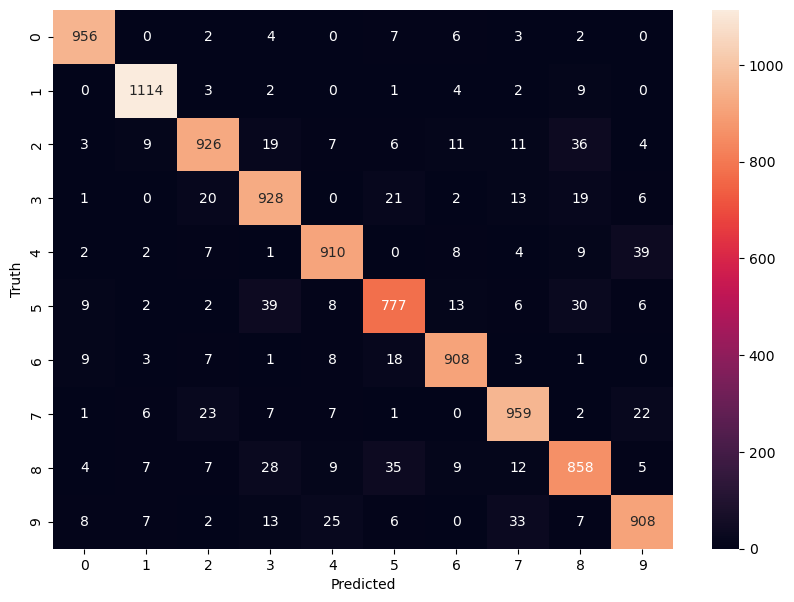

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2507 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1172 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0863 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0687 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0560 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0292 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.025

In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9788


[0.07776081562042236, 0.9787999987602234]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

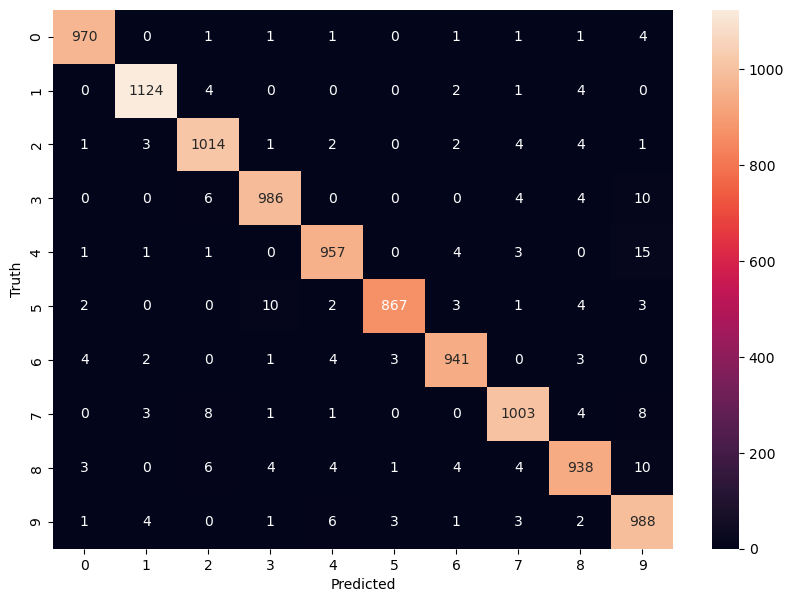

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2551 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1168 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0852 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0552 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0383 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.024

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 929us/step - loss: 0.0872 - accuracy: 0.9760


[0.08724319934844971, 0.9760000109672546]

Connvolutional layer Added as the first layer of the ANN
which improved accuracy 


In [29]:
from tensorflow import keras

# Assuming X_train has shape (num_samples, 28, 28) for grayscale images
# If you have color images, the input shape should be (28, 28, 3) assuming RGB
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)

model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming X_train has shape (num_samples, 28, 28, 1) for grayscale images
# If you have color images, the input shape should be (num_samples, 28, 28, 3) assuming RGB
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1780 - accuracy: 0.9448
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0525 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0249 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0133 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0072 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0050 - accuracy: 0.9986
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9891


[0.045211732387542725, 0.9890999794006348]